<table><tr>
<td> <img src="../images/URV.png" style="width: 250px;"/> </td>
<td> <img src="../images/UOC.jpg" style="width: 250px;"/> </td>
</tr></table>

# Quantitative analysis of Chainlink 

<img src="../images/LINK.png" style="width: 200px;"/>

In the following lines we will construct a brief quantitative analysis of Chainlink. Its purpose is to show the reader the price and return fluctuations of this crypto and to prove whether its returns can be considered as normally-distributed or not.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr
import scipy.stats as stats

# Establishing the cryptocurrency ticker
crypto = 'LINK'

___

## Import LINK data

In [2]:
# Importing data with Dask for time optimization
df = pd.read_csv('../Crypto prices/{}USDT.csv'.format(crypto))
df.set_index(pd.to_datetime(df['datetime']), inplace = True)

# First 5 rows
df.head(5)

,datetime,close,perc_return,cum_return,log_return,volume,trades
datetime,,,,,,,
2019-01-16 11:00:00,2019-01-16 11:00:00,0.5194,NaN,NaN,NaN,91.11,2
2019-01-16 11:01:00,2019-01-16 11:01:00,0.5050,-2.77243,-0.02772,-2.81159,1541.34,5
2019-01-16 11:02:00,2019-01-16 11:02:00,0.5300,4.95050,0.02041,4.83186,6709.00,5
2019-01-16 11:03:00,2019-01-16 11:03:00,0.5247,-1.00000,0.01020,-1.00503,305.76,2
2019-01-16 11:04:00,2019-01-16 11:04:00,0.5198,-0.93387,0.00077,-0.93826,10490.68,11


___

## Price and return charts

### Setting arrays

In [3]:
# Setting daily data
daily_prices = df[['close']].resample('D').last()

# Creating the log returns for daily prices
daily_return = round(np.log(daily_prices.close).diff().dropna() * 100, 2)

### LINK price time series

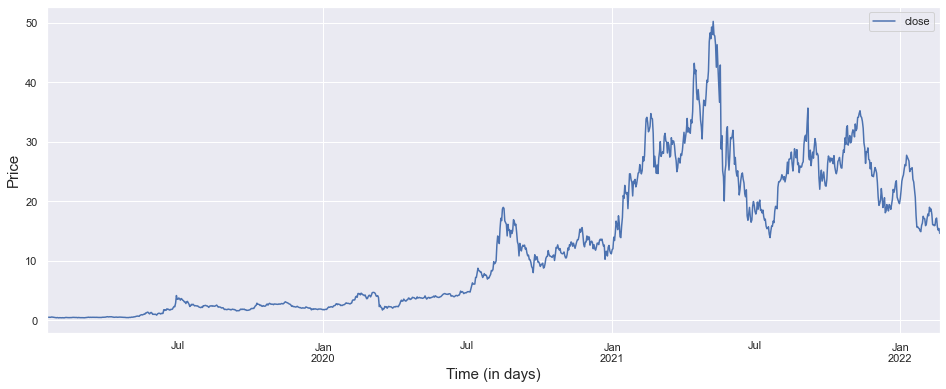

In [4]:
ax1 = daily_prices.plot()
ax1.set_ylabel(ylabel = "Price", fontdict={'fontsize':15})
ax1.set_xlabel(xlabel = "Time (in days)", fontdict={'fontsize':15});

### LINK log returns

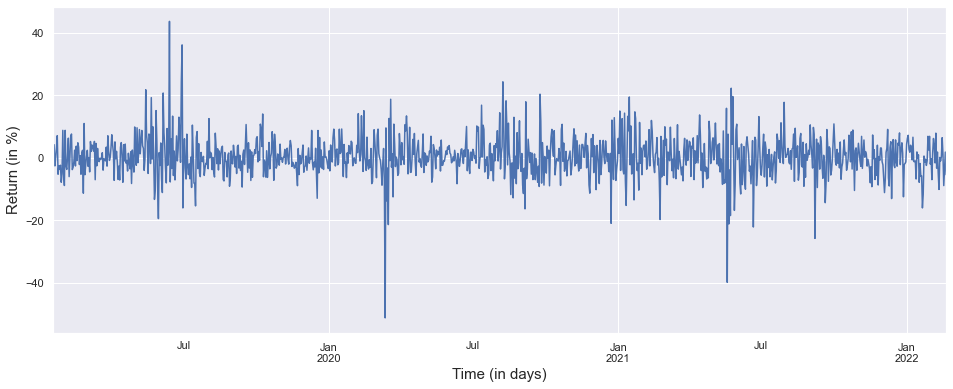

In [5]:
ax2 = daily_return.plot()
ax2.set_ylabel(ylabel = "Return (in %)", fontdict={'fontsize':15})
ax2.set_xlabel(xlabel = "Time (in days)", fontdict={'fontsize':15});

## Assessing normality

We will now compare and assess the normality of the cryptocurrency's returns against some random numbers that follow a normal distribution. For that, we will replicate a normal distribution with the exact same mean, standard deviation and N as the crypto sample. Later, we will provide a Kurtosis test, a Q-Q plot and both histograms.

### Random normally-distributed numbers

We first pull the most elementary statistical metrics from the sample:

In [6]:
n, minmax, mean, var, skew, kurt = stats.describe(daily_return, nan_policy='omit')
mini, maxi = minmax
std = np.sqrt(var)

# Print the recently-extracted data
daily_return.describe()

count    1131.000000
mean        0.300752
std         6.606362
min       -51.270000
25%        -3.285000
50%         0.080000
75%         3.865000
max        43.590000
Name: close, dtype: float64

Then we recreate a normal distribution with the same features as the sample:

In [7]:
# Normally-distributed recreation
normal_distr = stats.norm.rvs(mean, std, n)

### Kurtosis Test

In [13]:
# Kurtosis test for the sample normal distribution
x_test = stats.kurtosistest(normal_distr)

# Kurtosis test for the crypto sample
crypto_test = stats.kurtosistest(daily_return, nan_policy='omit')

# Creating table and showing data
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"{crypto}: {crypto_test[0]:13.2f}{crypto_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.79          0.4318
LINK:         13.09          0.0000


### Q-Q Plot

#### Normal Sample

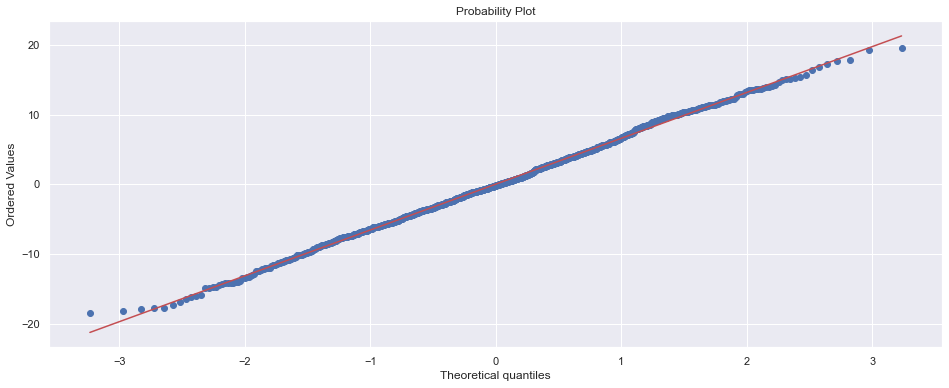

In [9]:
stats.probplot(normal_distr, dist = "norm", plot = plt)
plt.show()

#### LINK Sample

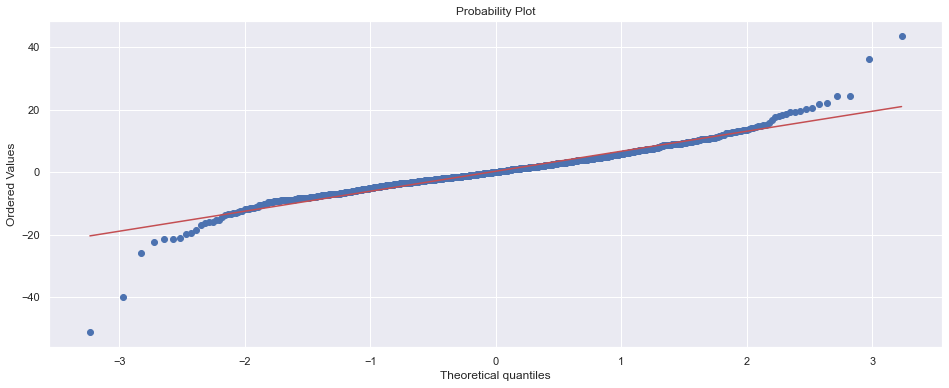

In [10]:
stats.probplot(daily_return, dist = "norm", plot = plt)
plt.show()

### Histograms

#### Normal Sample

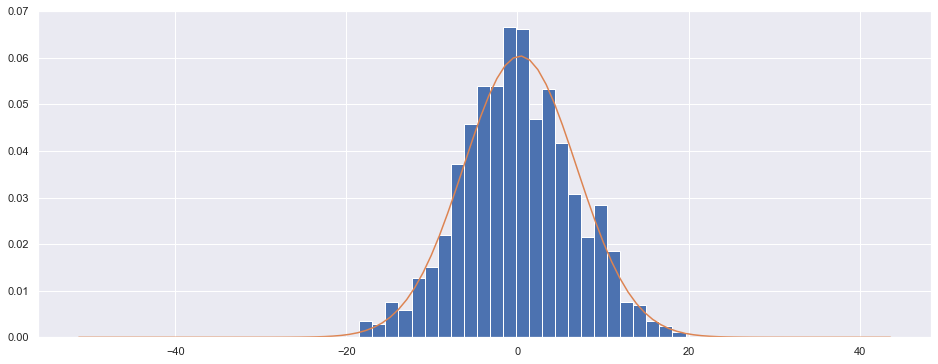

In [11]:
plt.hist(normal_distr, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, stats.norm.pdf(data, mean, std));

#### LINK Sample

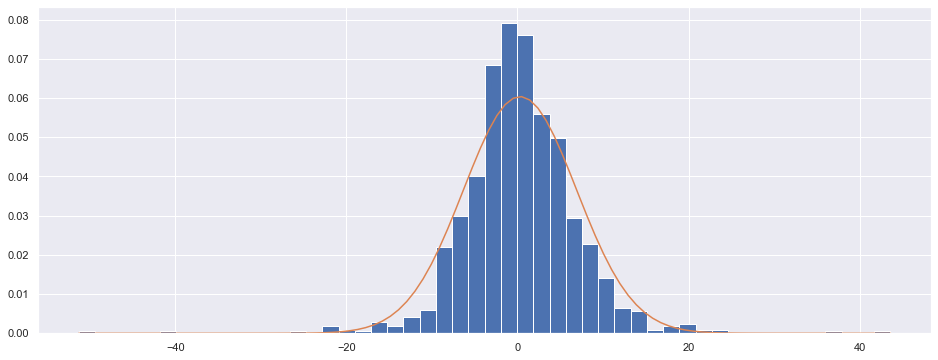

In [12]:
plt.hist(daily_return, bins = 50, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, stats.norm.pdf(data, mean, std));